In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split, TensorDataset
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data_y= data[data.columns[-1]]
data_y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
data_x=data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
data_x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
data_x = pd.get_dummies(data_x)
data_x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


In [ ]:
escalador = StandardScaler()
data_x= escalador.fit_transform(data_x)
print(data_x)

[[-0.32622142  0.29351742 -1.04175968 ... -0.57380915  1.09598752
  -1.09598752]
 [-0.44003595  0.19816383 -1.38753759 ...  1.74273971  1.09598752
  -1.09598752]
 [-1.53679418  0.29351742  1.03290776 ... -0.57380915  1.09598752
  -1.09598752]
 ...
 [ 0.60498839 -0.27860412  0.68712986 ... -0.57380915  1.09598752
  -1.09598752]
 [ 1.25683526  0.29351742 -0.69598177 ... -0.57380915 -0.91241915
   0.91241915]
 [ 1.46377078 -1.04143285 -0.35020386 ... -0.57380915  1.09598752
  -1.09598752]]


In [ ]:
data_x.shape

(10000, 13)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data_x, data_y,test_size=0.2, random_state=2)
print('x_train: {}, x_test: {}, y_train: {}, y_test: {}'.format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))


x_train: (8000, 13), x_test: (2000, 13), y_train: (8000,), y_test: (2000,)


In [ ]:
x_train.shape

(8000, 13)

In [ ]:
n_entradas= x_train.shape[1]
n_entradas

13

In [ ]:
t_x_train= torch.from_numpy(x_train).float().to('cpu')
t_x_test= torch.from_numpy(x_test).float().to('cpu')
t_y_train= torch.from_numpy(y_train.values).float().to('cpu')
t_y_test= torch.from_numpy(y_test.values).float().to('cpu')

In [ ]:
t_y_train

tensor([0., 0., 0.,  ..., 0., 1., 0.])

In [ ]:
t_y_test

tensor([1., 1., 1.,  ..., 1., 1., 0.])

In [ ]:
t_y_train=t_y_train[:,None]
t_y_train

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [1.],
        [0.]])

In [ ]:
t_y_test=t_y_test[:,None]
t_y_test

tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [0.]])

In [ ]:
test= TensorDataset(t_x_test, t_y_test)
test

In [ ]:
class Red(nn.Module):
  def __init__(self, n_entradas):
    super(Red, self).__init__()
    self.linear1= nn.Linear(n_entradas, 15)
    self.linear2= nn.Linear(15, 8)
    #self.linear3= nn.Linear(8, 160)
    #self.linear4= nn.Linear(160, 200)
    #self.linear5= nn.Linear(200, 1)
    self.linear3= nn.Linear(8, 1)
  def forward(self, inputs):
    pred_1= torch.sigmoid(input=self.linear1(inputs))
    pred_2= torch.sigmoid(input=self.linear2(pred_1))
    #prediction= torch.sigmoid(input=self.linear3(prediction))
    #prediction= torch.sigmoid(input=self.linear4(prediction))
    #prediction= torch.sigmoid(input=self.linear5(prediction))
    pred_f= torch.sigmoid(input=self.linear3(pred_2))
    return pred_f

In [ ]:
%%time
lr=0.001
epochs=2000
estatus_print=100

model= Red(n_entradas=n_entradas)
loss_fn= nn.BCELoss()
optimizer= torch.optim.Adam(params=model.parameters(), lr=lr)
print('Arquitectura del modelo: {}'.format(model))

Arquitectura del modelo: Red(
  (linear1): Linear(in_features=13, out_features=15, bias=True)
  (linear2): Linear(in_features=15, out_features=8, bias=True)
  (linear3): Linear(in_features=8, out_features=1, bias=True)
)
CPU times: user 4.86 s, sys: 455 ms, total: 5.32 s
Wall time: 6.52 s


In [ ]:
#Train model
print('Training model')
historico=pd.DataFrame()

for epoch in range(1, epochs+1):
  y_pred= model(t_x_train)
  loss= loss_fn(input=y_pred, target=t_y_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch % estatus_print==0:
    print(f'\nEpoch {epoch} \t Loss: {round(loss.item(), 4)}')

  with torch.no_grad():
    y_pred= model(t_x_test)
    y_pred_class= y_pred.round()
    correct=(y_pred_class==t_y_test).sum()
    accuracy= 100*correct/float(len(t_y_test))

    if epoch % estatus_print ==0:
      print('Accuracy: {}'.format(accuracy.item()))

  df_tmp= pd.DataFrame(data={
      'Epoch': epoch,
      'Loss': round(loss.item(), 4),
      'Accuracy': round(accuracy.item(), 4)
  }, index=[0])
  historico=pd.concat(objs=[historico, df_tmp], ignore_index=True, sort=False)
print('Accuracy final: {}'.format(round(accuracy.item(), 4)))

Training model

Epoch 100 	 Loss: 0.3688
Accuracy: 84.69999694824219

Epoch 200 	 Loss: 0.3638
Accuracy: 84.80000305175781

Epoch 300 	 Loss: 0.3594
Accuracy: 85.0

Epoch 400 	 Loss: 0.3552
Accuracy: 85.05000305175781

Epoch 500 	 Loss: 0.3514
Accuracy: 85.0999984741211

Epoch 600 	 Loss: 0.348
Accuracy: 85.1500015258789

Epoch 700 	 Loss: 0.3449
Accuracy: 85.0999984741211

Epoch 800 	 Loss: 0.3418
Accuracy: 85.3499984741211

Epoch 900 	 Loss: 0.3388
Accuracy: 85.3499984741211

Epoch 1000 	 Loss: 0.3358
Accuracy: 85.6500015258789

Epoch 1100 	 Loss: 0.333
Accuracy: 85.5999984741211

Epoch 1200 	 Loss: 0.3305
Accuracy: 85.80000305175781

Epoch 1300 	 Loss: 0.3281
Accuracy: 85.80000305175781

Epoch 1400 	 Loss: 0.3257
Accuracy: 85.8499984741211

Epoch 1500 	 Loss: 0.3237
Accuracy: 85.6500015258789

Epoch 1600 	 Loss: 0.3219
Accuracy: 85.75

Epoch 1700 	 Loss: 0.3202
Accuracy: 85.69999694824219

Epoch 1800 	 Loss: 0.3186
Accuracy: 85.6500015258789

Epoch 1900 	 Loss: 0.3172
Accuracy: 85.5

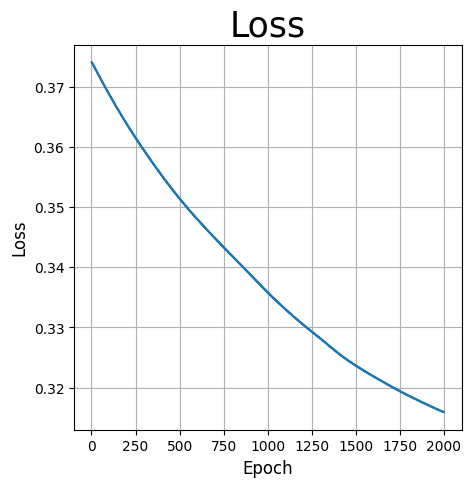

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5, 5))
plt.plot(historico['Epoch'], historico['Loss'], label='Loss')
plt.title('Loss', fontsize= 25)
plt.xlabel('Epoch', fontsize= 12)
plt.ylabel('Loss', fontsize= 12)
plt.grid()
plt.show()

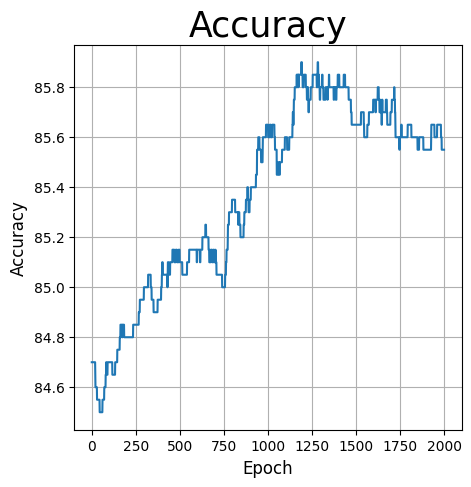

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(historico['Epoch'], historico['Accuracy'], label='Accuracy')
plt.title('Accuracy', fontsize=25)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid()
plt.show()

In [ ]:
t_x_test

tensor([[ 0.8326, -0.0879,  1.7245,  ..., -0.5738,  1.0960, -1.0960],
        [-0.0572,  0.1982, -1.0418,  ..., -0.5738,  1.0960, -1.0960],
        [-0.3366,  1.6285,  0.6871,  ..., -0.5738, -0.9124,  0.9124],
        ...,
        [ 0.8740, -0.0879, -1.3875,  ..., -0.5738,  1.0960, -1.0960],
        [ 0.3877,  0.0075, -1.7333,  ..., -0.5738,  1.0960, -1.0960],
        [ 0.7291,  0.6749, -1.3875,  ..., -0.5738, -0.9124,  0.9124]])

In [ ]:
predicction= model(t_x_test)
print(predicction)

tensor([[0.2585],
        [0.4650],
        [0.2253],
        ...,
        [0.6605],
        [0.0434],
        [0.4138]], grad_fn=<SigmoidBackward0>)


In [ ]:
display(predicction)

tensor([[0.2585],
        [0.4650],
        [0.2253],
        ...,
        [0.6605],
        [0.0434],
        [0.4138]], grad_fn=<SigmoidBackward0>)

In [ ]:
#Convertir Tensor->Array->DataFrame
numpy_array=predicction.detach().numpy()
df_prediction=pd.DataFrame(numpy_array)
print(df_prediction)
#Paso directo  Tensor->DataFrame
#import torch
#import pandas as pd
#df=pd.DataFrame(predicction)
#print(df)
# No funciona necesita el paso array

             0
0     0.258510
1     0.465029
2     0.225309
3     0.011516
4     0.018010
...        ...
1995  0.381186
1996  0.007592
1997  0.660547
1998  0.043384
1999  0.413772

[2000 rows x 1 columns]


In [ ]:
#df=df_pred[0].round(0)
df_prediction=df_prediction.round()
#df=df_pred.round({'0',0})
#df[0]
df_prediction

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1995,0.0
1996,0.0
1997,1.0
1998,0.0


In [ ]:
y_test

,Exited
7878,1
3224,1
1919,1
4432,0
4835,0
...,...
9073,1
8584,0
5390,1
5092,1


In [ ]:
list_y_test=list(y_test)
len(list_y_test)

2000

In [ ]:
list_x_test=list(predicction)
len(list_x_test)

2000

In [ ]:
count=0
for e in zip(list_x_test, list_y_test):
  if e[0]==e[1]:
    count+=1
print(count)

0


In [ ]:
df= pd.DataFrame()
df['y_Pred','y_test']=df_prediction[0], y_test
df

,"(y_Pred, y_test)"
0,0 0.0 1 0.0 2 0.0 3 0....
1,7878 1 3224 1 1919 1 4432 0 4835 ...


In [ ]:
df_prediction['y_test']=y_test
df_prediction

,0,y_test
0,0.0,NaN
1,0.0,NaN
2,0.0,NaN
3,0.0,0.0
4,0.0,0.0
...,...,...
1995,0.0,NaN
1996,0.0,NaN
1997,1.0,NaN
1998,0.0,NaN


In [ ]:
import pandas as pd
df_y_pred=pd.DataFrame()
df_y_pred['y_pred']=df[0]
df_y_pred
#df.columns=['y_pred']
#display(df)

,y_pred
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1995,0.0
1996,0.0
1997,1.0
1998,0.0


In [ ]:
y_test

,Exited
7878,1
3224,1
1919,1
4432,0
4835,0
...,...
9073,1
8584,0
5390,1
5092,1


In [ ]:
y_test.shape

(2000,)

In [ ]:
import pandas as pd
df_y_test=pd.DataFrame()
df_y_test['y_test']=y_test
df_y_test

,y_test
7878,1
3224,1
1919,1
4432,0
4835,0
...,...
9073,1
8584,0
5390,1
5092,1


In [ ]:
df_y_test.isnull().sum()

,0
y_test,0


In [ ]:
df_y_test.to_csv('df_y_test.csv')

In [ ]:
df_y_pred.size

4000

In [ ]:
df_y_test.size

2000

In [ ]:
df_y_pred['y_test']=y_test
#df=df.assing('y_test'=y_test)
#display(df)
df_y_pred

,y_pred,y_test
0,0.0,NaN
1,0.0,NaN
2,0.0,NaN
3,0.0,0.0
4,0.0,0.0
...,...,...
1995,0.0,NaN
1996,0.0,NaN
1997,1.0,NaN
1998,0.0,NaN


In [ ]:
df_y_pred.to_csv('out.csv')
print('ok')

ok
